In [5]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns


In [2]:
data_mon = pd.read_csv('data/monday.csv', parse_dates=True, index_col=0, sep=';')
data_tue = pd.read_csv('data/tuesday.csv', parse_dates=True, index_col=0, sep=';')
data_wed = pd.read_csv('data/wednesday.csv', parse_dates=True, index_col=0, sep=';')
data_thu = pd.read_csv('data/thursday.csv', parse_dates=True, index_col=0, sep=';')
data_fri = pd.read_csv('data/friday.csv', parse_dates=True, index_col=0, sep=';')

In [3]:
data_mon

,customer_no,location
timestamp,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:03:00,2,dairy
2019-09-02 07:04:00,3,dairy
2019-09-02 07:04:00,4,dairy
2019-09-02 07:04:00,5,spices
...,...,...
2019-09-02 21:49:00,1442,checkout
2019-09-02 21:49:00,1444,checkout
2019-09-02 21:49:00,1445,dairy


## Calculate the total number of customers in each section

In [19]:
data = pd.concat([data_mon, data_tue, data_wed, data_thu, data_fri])
d = data.groupby('location')
bar_data = d.count()
print(d.count())

          customer_no
location             
checkout         7417
dairy            4679
drinks           3905
fruit            5122
spices           3754


In [23]:
bar_data.index

Index(['checkout', 'dairy', 'drinks', 'fruit', 'spices'], dtype='object', name='location')

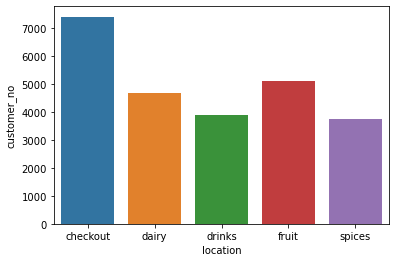

In [24]:
ax = sns.barplot(x=bar_data.index, y='customer_no', data=bar_data)

## Calculate the total number of customers in each section over time

In [39]:
day_dic = {2:'monday', 3:'tuesday', 4:'wednesday', 5:'thursday', 6:'friday'}
s = pd.Series(day_dic)
s_new = s[data.index.day]
s_new.index = data.index
data['day'] = s_new

In [93]:
data['day'] = s_new

In [94]:
data

,customer_no,location,day
timestamp,,,
2019-09-02 07:03:00,1,dairy,monday
2019-09-02 07:03:00,2,dairy,monday
2019-09-02 07:04:00,3,dairy,monday
2019-09-02 07:04:00,4,dairy,monday
2019-09-02 07:04:00,5,spices,monday
...,...,...,...
2019-09-06 21:50:00,1500,dairy,friday
2019-09-06 21:50:00,1507,checkout,friday
2019-09-06 21:50:00,1508,checkout,friday


In [106]:
d_day = data.groupby(['day', 'location'])
d_day_count = d_day.count()
print(d_day_count)

                    customer_no
day       location             
friday    checkout         1502
          dairy             932
          drinks            844
          fruit            1057
          spices            790
monday    checkout         1437
          dairy             895
          drinks            797
          fruit            1005
          spices            750
thursday  checkout         1532
          dairy             965
          drinks            776
          fruit            1041
          spices            790
tuesday   checkout         1420
          dairy             911
          drinks            713
          fruit             976
          spices            694
wednesday checkout         1526
          dairy             976
          drinks            775
          fruit            1043
          spices            730


In [119]:
d_day_count.reset_index(inplace=True)


<AxesSubplot:xlabel='day', ylabel='customer_no'>

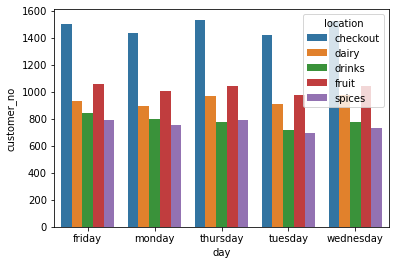

In [120]:
sns.barplot(x='day', y='customer_no', data=d_day_count, hue='location')

## Display the number of customers at checkout over time

In [138]:
data_ch = data[data['location']=='checkout'].groupby(['day', 'location']).count()
data_ch.reset_index(inplace=True)
data_ch = data_ch.reindex([1, 3, 4, 2, 0])
print(data_ch)

         day  location  customer_no
1     monday  checkout         1437
3    tuesday  checkout         1420
4  wednesday  checkout         1526
2   thursday  checkout         1532
0     friday  checkout         1502


Text(0.5, 1.0, 'Number of checkouts per day')

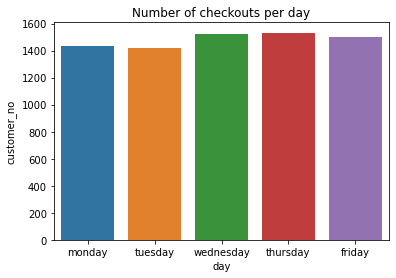

In [144]:
ax = sns.barplot(x='day', y='customer_no', data=data_ch)
ax.set_title('Number of checkouts per day')

## Calculate the time each customer spent in the market

In [10]:
dic = {2:'mo', 3:'tu', 4:'we', 5:'th', 6:'fr'}
#data['customer_ID'] =[dic[k] for k in data['day']]  + data['customer_no'].astype(str)
data['customer_ID'] = data['customer_no'].astype(str)+ '_'+  [dic[k] for k in data['day']]
g = data.groupby('customer_ID')
list_t = []
list_ID = []
for i, group in g:
    difference_minute = group.index.minute[len(group.index)-1]-group.index.minute[0]
    difference_hour = group.index.hour[len(group.index) - 1] - group.index.hour[0]
    duration = difference_hour*60 + difference_minute
    list_t.append(duration)
    list_ID.append(i)
ID_time_table = pd.DataFrame({'customer_ID':list_ID, 'duration(m)':list_t})
print(ID_time_table)

     customer_ID  duration(m)
0        1000_fr            1
1        1000_mo            7
2        1000_th           10
3        1000_tu            4
4        1000_we           13
...          ...          ...
7440        9_fr            3
7441        9_mo            7
7442        9_th            2
7443        9_tu           20
7444        9_we            1

[7445 rows x 2 columns]


## Calculate the total number of customers in the supermarket over time.

In [146]:
d_total = data.groupby(['day']).count()
d_total = d_total.reindex()
print(d_total)

           customer_no  location
day                             
friday            5125      5125
monday            4884      4884
thursday          5104      5104
tuesday           4714      4714
wednesday         5050      5050


In [149]:
d_total = d_total.reindex(['monday', 'tuesday', 'wednesday', 'thursday', 'friday'])

In [152]:
d_total.index

Index(['monday', 'tuesday', 'wednesday', 'thursday', 'friday'], dtype='object', name='day')

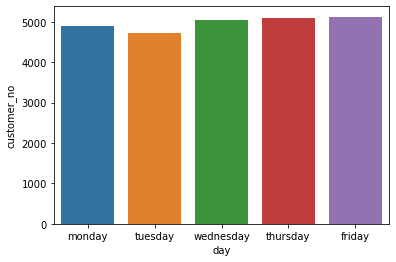

In [153]:
ax = sns.barplot(x=d_total.index, y='customer_no', data=d_total)

## Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).